In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets
import keras
from keras.datasets import mnist

# Question 1 - SOM


In [130]:
(x_train_full, y_train_full), (x_test_full, y_test_full) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [133]:
x_train = x_train_full[:2000]
y_train = y_train_full[:2000]
x_test = x_test_full[:1000]
y_test = y_test_full[:1000]

x_train = x_train.reshape(2000, 28*28)
x_test = x_test.reshape(1000, 28*28)

print(x_train.shape, x_test.shape)

(2000, 784) (1000, 784)


In [ ]:
class soMaps():
  def __init__(self, classeslen, inputlen, radius, lrate):
    self.w = np.random.normal(0, 10, (inputlen, classeslen))
    self.radius = radius
    self.lrate = lrate
    self.old_w = 

  def train(self, epoch, train_set, ):
    err = 1000000
    while err > 1:
      self.old_w = self.w
      for data in train_set:
        distances = np.linalg.norm(self.w - data, axis=1)
        j = np.argmin(distances)
        
      err = np.sum(np.sum(np.power(self.old_w - self.w, 2)))
      errs.append(err)



# Question 2 - MaxNet

In [141]:
class maxNet():
  def __init__(self, inLen, epsilon):
    self.epsilon = epsilon
    self.inLen = inLen
    self.dimension = inLen
    self.transvec = np.ones((self.dimension, self.dimension))*(-1*self.epsilon) + np.eye(self.dimension)*(1+self.epsilon)
    self.isdone = 0
    
  def normal_forward(self, inVec):
    self.vector = inVec
    a_new = self.vector
    self.isdone = 0
    while self.isdone==0 :
      # print(self.transvec.shape)
      # print(a_new)
      a_temp = np.matmul(self.transvec, a_new)
      a_new = self.activation(a_temp)
      print("new vector is: \n{}".format(a_new))
      if np.count_nonzero(a_new)==1 :
        self.isdone = 1
        print("maximum argument is: {}".format(np.argmax(a_new)+1))


  def activation(self, vector):
    return np.array([vector[i] if vector[i] >= 0 else 0 for i in range(len(vector))])


In [142]:
inVec = np.array([1.2, 1.1, 0.5, 1.5, 1.13, 0.8])
new_maxNet = maxNet(len(inVec), 0.13)
new_maxNet.normal_forward(inVec)

new vector is: 
[0.5461 0.4331 0.     0.8851 0.467  0.0941]
new vector is: 
[0.301791 0.174101 0.       0.684861 0.212408 0.      ]
new vector is: 
[0.1625129  0.0182232  0.         0.595382   0.06151011 0.        ]
new vector is: 
[0.07474791 0.         0.         0.56388999 0.         0.        ]
new vector is: 
[0.00144221 0.         0.         0.55417276 0.         0.        ]
new vector is: 
[0.         0.         0.         0.55398528 0.         0.        ]
maximum argument is: 4


## Part 2.

In [143]:
inVec2 = np.array([1.2,1.1,0.5,-1.5,1.13,-0.8])
inVec2 = np.concatenate((inVec2, -1*inVec2))
newer_maxNet = maxNet(len(inVec2), 0.13)
newer_maxNet.normal_forward(inVec2)

new vector is: 
[1.356  1.243  0.565  0.     1.2769 0.     0.     0.     0.     1.695
 0.     0.904 ]
new vector is: 
[0.617093 0.489403 0.       0.       0.52771  0.       0.       0.
 0.       1.000163 0.       0.106333]
new vector is: 
[0.34102383 0.19673413 0.         0.         0.24002104 0.
 0.         0.         0.         0.77389293 0.         0.        ]
new vector is: 
[0.18363958 0.02059222 0.         0.         0.06950642 0.
 0.         0.         0.         0.67278166 0.         0.        ]
new vector is: 
[0.08446514 0.         0.         0.         0.         0.
 0.         0.         0.         0.63719569 0.         0.        ]
new vector is: 
[0.0016297  0.         0.         0.         0.         0.
 0.         0.         0.         0.62621522 0.         0.        ]
new vector is: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.62600336 0.         0.        ]
maximum argument is: 10


# Question 3 - Mexican Hat

In [148]:
class mexicanHat():
  def __init__(self, r1, r2, inVec, c1, c2, t_max):
    self.tmax = t_max
    self.r1 = r1
    self.r2 = r2
    self.c1 = c1
    self.c2 = c2
    self.inVec = inVec
    self.test_factor = int(self.tmax/4)

  def normal_forward(self):
    x_out = self.inVec
    for t in range(self.tmax+1):
      for i in range(len(self.inVec)):
        sum = np.sum(np.array([self.multiplier(i, j, x_out[j]) for j in range(len(self.inVec))]))
        x_out[i] = self.activation(sum)
      
      if ((t+1)%self.test_factor == 0):
        print(x_out)
        plt.figure()
        plt.plot(range(1, len(self.inVec)+1), x_out)
        plt.ylim([0,3])

      # print("iteration {}: \n{}".format(t, x_out))



  def multiplier(self, i, j, element):
    if (i-j == 0):
      return element
    elif (i-j < self.r1 and i-j > -1*self.r1):
      return self.c1*element
    elif ((i-j > self.r1 and i-j < self.r2) or (i-j < -1*self.r1 and i-j > -1*self.r2)):
      return self.c2*element
    else:
      return 0

  def activation(self, input):
    if input>=2 :
      return 2
    elif input<2 and input >=0 :
      return input
    else:
      return 0


0
[0.17172285 0.04711694 0.13275999 0.33395657 0.53503891 0.68345769
 0.26424515 0.19206186 0.         0.12093084]
[0.07120292 0.         0.03176737 0.24425866 0.45651466 0.61330675
 0.17342719 0.09848966 0.         0.02468615]
[0.         0.         0.         0.18029626 0.40403272 0.56935893
 0.10749018 0.02940346 0.         0.        ]
[0.         0.         0.         0.12834816 0.36402773 0.53819573
 0.05308533 0.         0.         0.        ]


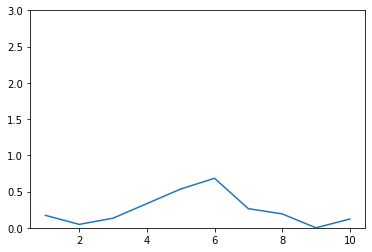

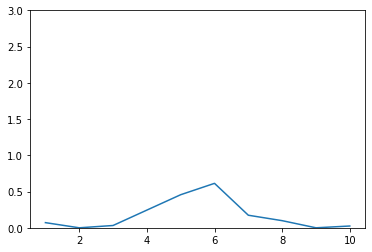

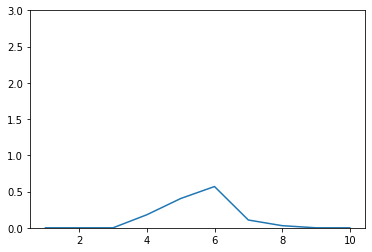

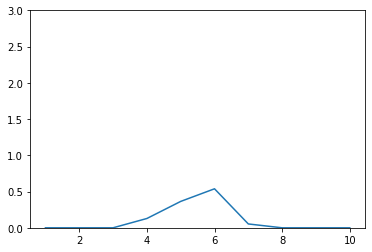

In [156]:
inVec_3 = np.array([0.32,0.2,0.28,0.47,0.66,0.8,0.4,0.33,0.1,0.26])
new_mexicanHat = mexicanHat(0, len(inVec_3), inVec_3, 0.01, -0.01, 20)
new_mexicanHat.normal_forward()

[0.         0.         0.         0.0905706  0.35524052 0.52782029
 0.02012052 0.         0.         0.        ]
[0.         0.         0.         0.06368784 0.35466909 0.52410333
 0.         0.         0.         0.        ]
[0.         0.         0.         0.03753589 0.35466909 0.521704
 0.         0.         0.         0.        ]
[0.         0.         0.         0.0114778  0.35466909 0.52060919
 0.         0.         0.         0.        ]


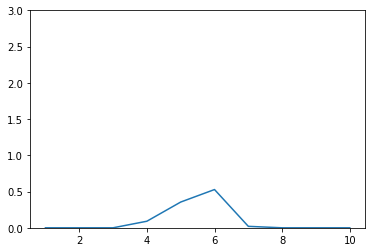

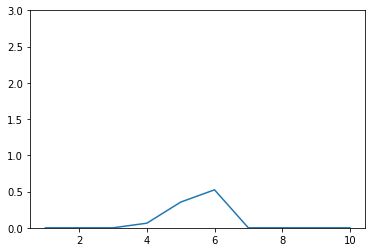

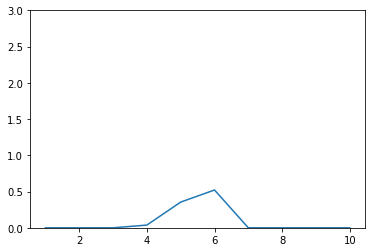

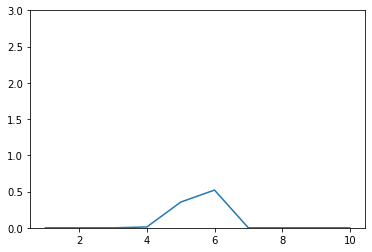

In [157]:
new_mexicanHat = mexicanHat(1, 5, inVec_3, 0.01, -0.01, 20)
new_mexicanHat.normal_forward()

# Question 4 - Hamming Net

In [104]:
class hammingLayer():
  def __init__(self, base_vectors):
    self.W = base_vectors.T
    self.b = (len(base_vectors[0]) / 2) * np.ones((1, len(base_vectors)))

  def normal_forward(self, vector):
    a = np.matmul(vector, self.W)  + self.b
    return a.reshape(3,1)


In [105]:
base_vecs = np.asarray([[1,-1,1,-1,1,-1],
                      [-1,1,-1,1,-1,-1],
                      [1,1,1,-1,-1,-1]])

newhLayer = hammingLayer(base_vecs)
print(newhLayer.normal_forward(np.array([1,1,1,-1,-1,-1]).reshape(1,6)))

[[5.]
 [3.]
 [9.]]


In [127]:
class hammingNet():
  def __init__(self, base_vectors):
    self.hamminglayer = hammingLayer(base_vectors)
    self.classnumbers = len(base_vectors)
    self.maxnet = maxNet(self.classnumbers, 0.13) 

  def normal_forward(self, testVec):
    out_temp = self.hamminglayer.normal_forward(testVec)
    out_temp = self.maxnet.normal_forward(out_temp)


In [128]:
new_hamming_net = hammingNet(base_vecs)
v1 = np.array([1,1,1,1,1,1])
v2 = np.array([-1,1,-1,-1,1,1])
v3 = np.array([-1,-1,1,1,1,1])
v4 = np.array([-1,-1,1,1,-1,1])
v5 = np.array( [-1,1,1,-1,-1,-1])

print("v1: ")
new_hamming_net.normal_forward(v1)

print("v2: ")
new_hamming_net.normal_forward(v2)

print("v3: ")
new_hamming_net.normal_forward(v3)

print("v4: ")
new_hamming_net.normal_forward(v4)

print("v5: ")
new_hamming_net.normal_forward(v5)

v1: 
maximum argument is: 3
v2: 
maximum argument is: 2
v3: 
maximum argument is: 1
v4: 
maximum argument is: 2
v5: 
maximum argument is: 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
